# Photorealistic Style Transfer using WTC2


Tensorflow and Keras implementation by [ptran1203](https://github.com/ptran1203) and [vunquitk11](https://github.com/vunquitk11).

Extended with a [gradio interface](https://gradio.app/). 

## Mount drive and clone GitHub

In [1]:
from google.colab import drive, output
import os
import json

drive.mount('/content/drive')
%cd /content/drive/MyDrive/
!rm -rf '/content/drive/MyDrive/photorealistic_style_transfer'
!git clone https://github.com/ptran1203/photorealistic_style_transfer
%cd /content/drive/myDrive/photorealistic_style_transfer

Mounted at /content/drive
/content/drive/MyDrive
Cloning into 'photorealistic_style_transfer'...
remote: Enumerating objects: 983, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 983 (delta 81), reused 95 (delta 37), pack-reused 838
Receiving objects: 100% (983/983), 111.08 MiB | 17.19 MiB/s, done.
Resolving deltas: 100% (500/500), done.
Checking out files: 100% (146/146), done.
[Errno 2] No such file or directory: '/content/drive/myDrive/photorealistic_style_transfer'
/content/drive/MyDrive


In [2]:
if not os.path.exists("/content/drive/MyDrive/photorealistic_style_transfer/tfrecords"):
    !wget -O /content/drive/MyDrive/photorealistic_style_transfer/tfrecords.zip https://github.com/ptran1203/photorealistic_style_transfer/releases/download/v1.0/tfrecords.zip
    !unzip /content/drive/MyDrive/photorealistic_style_transfer/tfrecords.zip -d /content/drive/MyDrive/photorealistic_style_transfer/
output.clear()

# Gradio Interface


In [6]:
%cd /content/drive/MyDrive/photorealistic_style_transfer
!pip install --quiet gradio

/content/drive/MyDrive/photorealistic_style_transfer


In [8]:
import gradio as gr
from model import WCT2
import cv2
import numpy as np

# load model
model = WCT2()
model.load_weight('./checkpoints/wtc2.h5')

# Helper Functions
# Scale Image according to given width or height
def image_resize(img, width):

  # original size of the img
  original_h = img.shape[0]
  original_w = img.shape[1]

  # ratio to new width
  r = width / float(original_w)

  # new dimensions
  dim = (width, int(original_h * r))

  # resize to new dimensions
  resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

  return resized

def preprocess(img, size):

  # set color mode to BGR
  bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  # resize image
  resized_img = image_resize(bgr_img, size)

  # expand the array by one dimension
  processed_img = np.expand_dims(resized_img, 0)

  return processed_img



def pst(input_img, style_img):

  # preprocess images
  image_size = 512
  content = preprocess(input_img, image_size)
  style = preprocess(style_img, image_size)

  # transfer the style
  gen_img = model.transfer(content, style, 1.0)

  # write generated img to a png file
  cv2.imwrite('./examples/output/output.png', gen_img[0])

  # transform array to PIL img
  # final_img = PIL.Image.fromarray(gen_img[0], 'RGB')
  final_img = './examples/output/output.png'

  return final_img

# Interface attributes
iface_input = [gr.inputs.Image(label="Original Image"), gr.inputs.Image(label="Style Image")]
iface_output = [gr.outputs.Image(type='file')]
iface_title = "Photorealistic Style Transfer with WCT2"
iface_description = "Transfer the style of a photo to your own. The model implementation is based on a Tensorflow and Keras implementation by https://github.com/ptran1203/photorealistic_style_transfer"

iface = gr.Interface(
  fn = pst, 
  inputs= iface_input,
  outputs= iface_output,
  title = iface_title,
  description = iface_description
  )

iface.launch()

80150528/80134624 [==============================] - 1s 0us/step
Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://22159.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://22159.gradio.app')

# Full Colab Implementation

## Training

Not really necessairy since the pretrained WCT2 model is very sufficient. 

In [ ]:
!python3 train.py --train-tfrec /content/drive/MyDrive/photorealistic_style_transfer/tfrecords/train.tfrec\
                --val-tfrec /content/drive/MyDrive/photorealistic_style_transfer/tfrecords/val.tfrec\
                --epochs 100\
                --resume\
                --batch-size 8\
                --lr 2e-4\

## Inference

In [ ]:
!python3 inference.py --content /content/drive/MyDrive/photorealistic_style_transfer/examples/input/in21.png\
                     --style /content/drive/MyDrive/photorealistic_style_transfer/examples/style\
                     --output /content/drive/MyDrive/photorealistic_style_transfer/tests

## Generate Image

In [ ]:
from model import WCT2
from utils import read_img, download_weight, display_outputs
import cv2

model = WCT2()
model.load_weight('/content/drive/MyDrive/photorealistic_style_transfer/checkpoints/wtc2.h5')

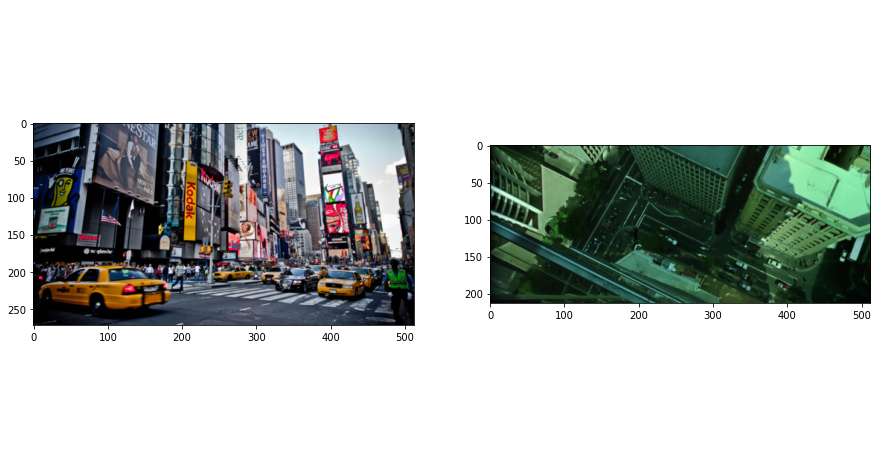

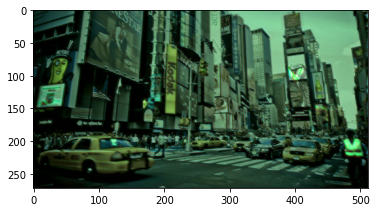

In [ ]:
idx = 10
# Change paths to your desired images
content = f'/content/drive/MyDrive/photorealistic_style_transfer/examples/input/in{idx}.png'
style = f'/content/drive/MyDrive/photorealistic_style_transfer/examples/style/tar{idx}.png'

image_size = 512
content = read_img(content, image_size, expand_dims=True)
style = read_img(style, image_size, expand_dims=True)

gen = model.transfer(content, style, 1.0)
cv2.imwrite('/content/drive/MyDrive/photorealistic_style_transfer/examples/output/test.png', gen[0][...,::-1])
display_outputs(content[0], style[0], gen[0])

In [ ]:
gen